In [1]:
%matplotlib inline

import numpy as np

import tensorflow.data as tf_data
import tensorflow.keras as keras
import tensorflow.keras.regularizers as regularizers
import tensorflow.train as train
import tensorflow.keras.layers as layers

import matplotlib.pyplot as plt

In [2]:
def load_data(file):
    data = np.loadtxt(file, delimiter=',', skiprows=1)
    return data

def split_train_eval(data, ratio):
    rows = data.shape[0]
    rows = int(rows * ratio)
    train_data, eval_data = np.split(data, [rows,], axis=0)
    
    return train_data, eval_data

def split_x_y(data):
    x = data[:, 1:]/256
    y = data[:, :1]
    
    print(x.shape)
    print(y.shape)
    
    return x, y
    

In [3]:
def build_model():
    model = keras.Sequential()
    model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2()))
    model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2()))
    model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2()))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(
        optimizer=train.AdamOptimizer(0.001, ),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [4]:
def best_prediction(predictions):
    best_prediction = max(
        enumerate(predictions), 
        key = lambda x: x[1]
    )
    label = best_prediction[0]
    
    return label
    

def visualize_prediction(datum, predictions):
    label = int(datum[0])
    datum = datum[1:]
    
    image = datum.reshape(28, 28)
    
    prediction = best_prediction(predictions)
    
    plt.title("Label: {}, Prediction: {}".format(label, prediction))
    plt.imshow(image, cmap='gray')
    plt.show()

In [5]:
data = load_data('train.csv')


In [6]:
x, y = split_x_y(data)


(42000, 784)
(42000, 1)


In [7]:
model = build_model()


Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.fit(x=x, y=y, batch_size=100, epochs=50, validation_split=0.2, shuffle=True)

Train on 33600 samples, validate on 8400 samples
Epoch 1/50
33600/33600 [==============================] - 4s 108us/sample - loss: 2.4652 - acc: 0.8746 - val_loss: 0.6828 - val_acc: 0.9243
Epoch 2/50
33600/33600 [==============================] - 3s 102us/sample - loss: 0.6511 - acc: 0.9165 - val_loss: 0.6152 - val_acc: 0.9162
Epoch 3/50
33600/33600 [==============================] - 3s 102us/sample - loss: 0.5751 - acc: 0.9259 - val_loss: 0.5592 - val_acc: 0.9267
Epoch 4/50
33600/33600 [==============================] - 3s 103us/sample - loss: 0.5287 - acc: 0.9317 - val_loss: 0.5231 - val_acc: 0.9294
Epoch 5/50
33600/33600 [==============================] - 3s 104us/sample - loss: 0.4907 - acc: 0.9392 - val_loss: 0.4653 - val_acc: 0.9454
Epoch 6/50
33600/33600 [==============================] - 3s 103us/sample - loss: 0.4690 - acc: 0.9411 - val_loss: 0.4424 - val_acc: 0.9483
Epoch 7/50
33600/33600 [==============================] - 3s 102us/sample - loss: 0.4423 - acc: 0.9448 - val_lo

In [11]:
predictions = model.predict(x[:50])

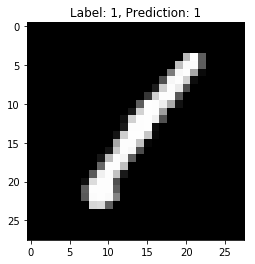

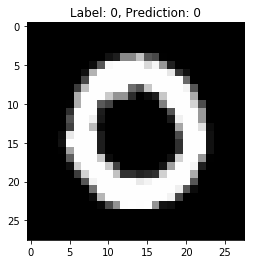

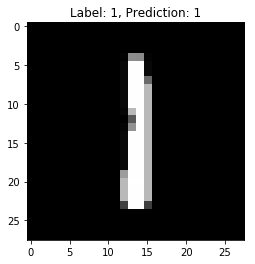

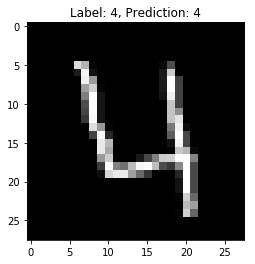

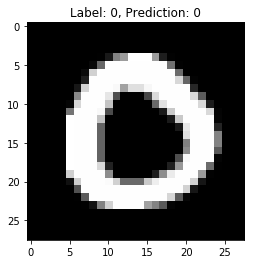

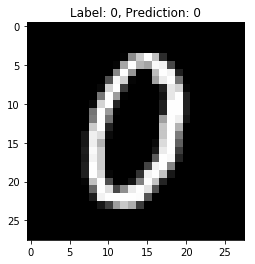

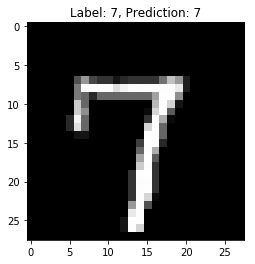

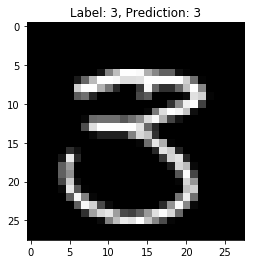

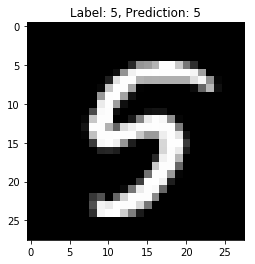

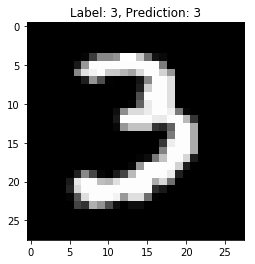

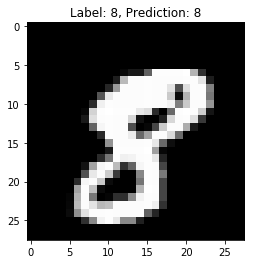

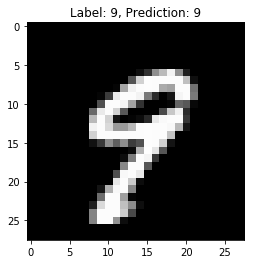

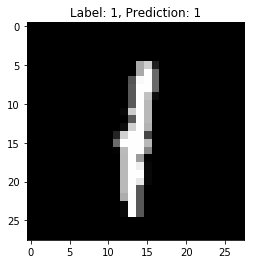

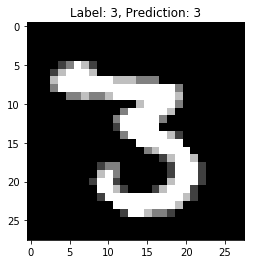

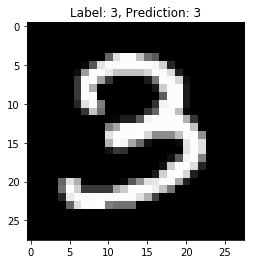

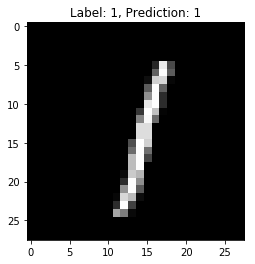

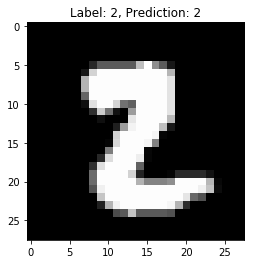

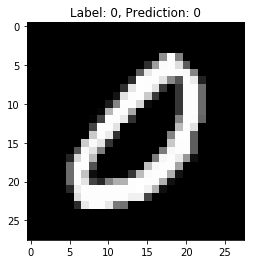

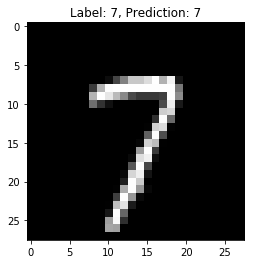

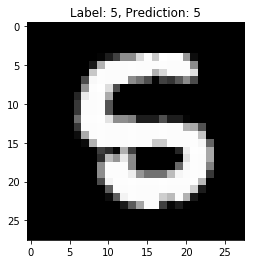

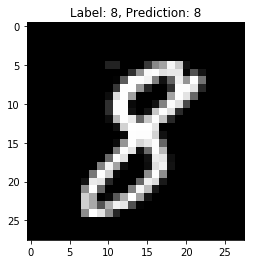

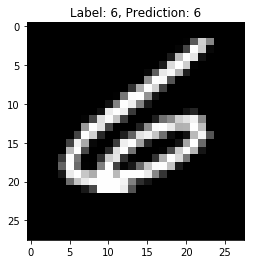

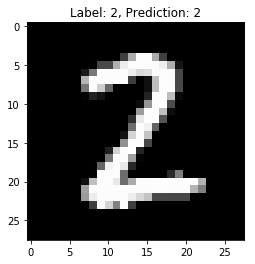

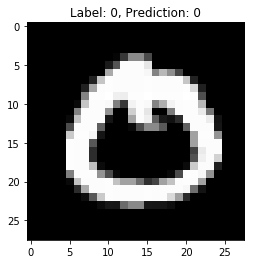

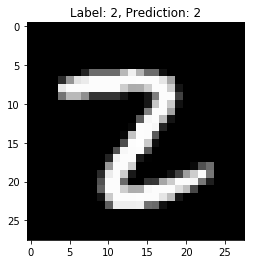

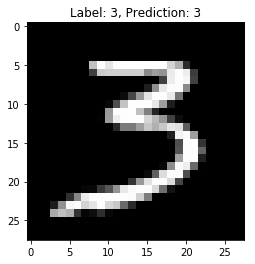

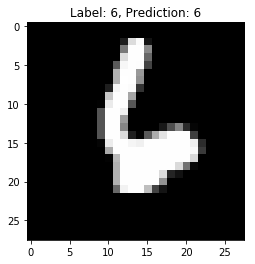

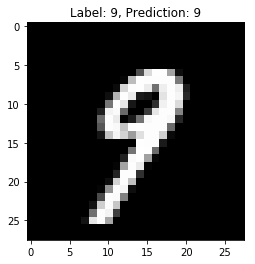

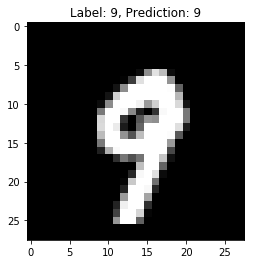

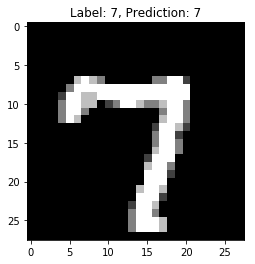

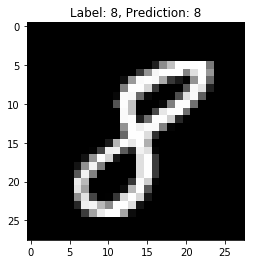

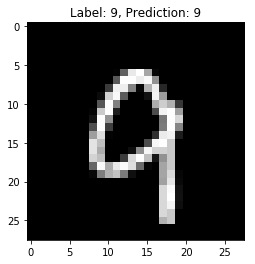

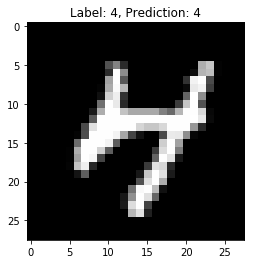

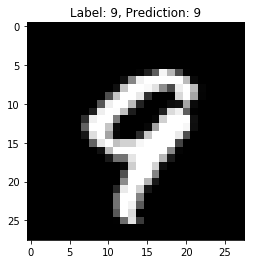

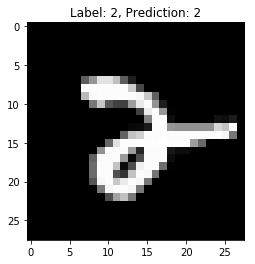

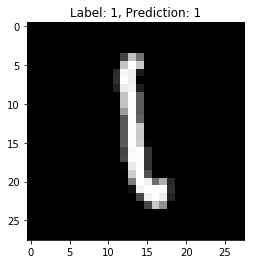

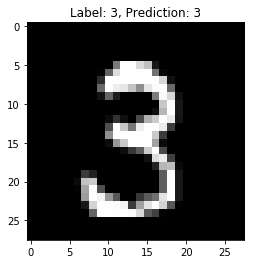

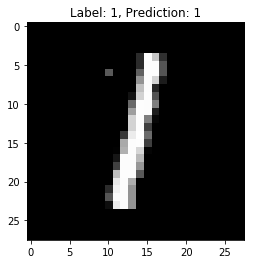

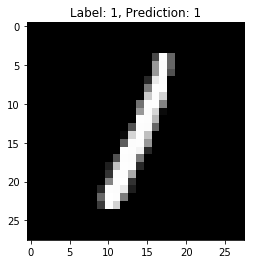

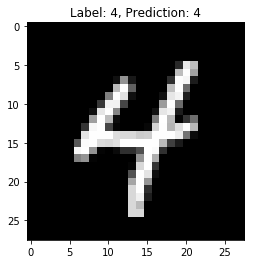

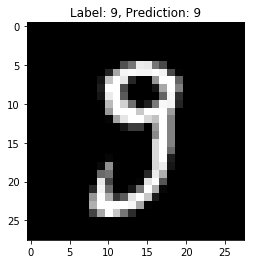

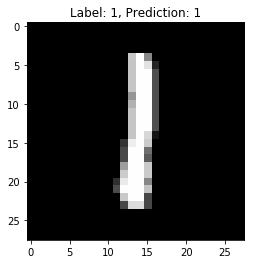

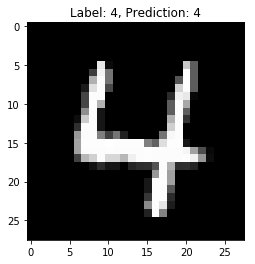

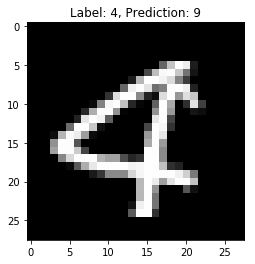

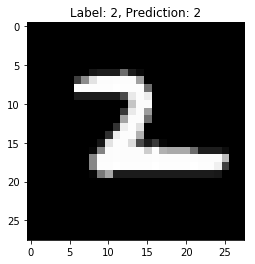

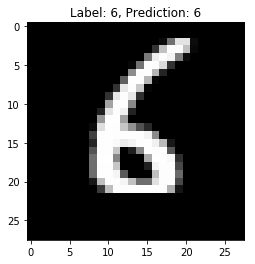

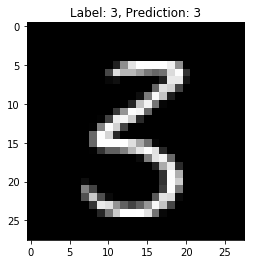

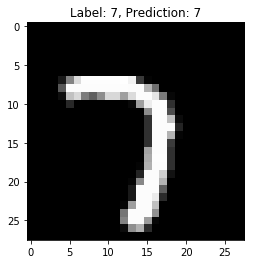

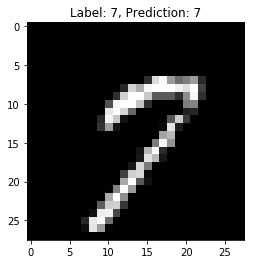

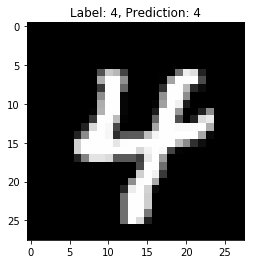

In [12]:
for prediction, datum in zip(predictions, data):
    visualize_prediction(datum, prediction)